In [1]:
from typing import List

from CONST import SEED, MODELS
from neural_networks import FNN, CNN, CRNN
from utils import set_seed, plot_confusion_matrix, make_predictions, calculate_metrics, save_metrics

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Model

2024-01-28 19:27:20.626754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-28 19:27:20.626795: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
set_seed(SEED)

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

2024-01-28 19:27:26.370999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-28 19:27:26.371243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-28 19:27:26.371344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-01-28 19:27:26.371413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-01-28 19:27:26.371505: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.8905 - accuracy: 0.7814
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4200 - accuracy: 0.8871
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3538 - accuracy: 0.9015
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3211 - accuracy: 0.9091
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
INFO:tensorflow:Assets written to: models/FNN/assets
Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.7427 - accuracy: 0.7908
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.2073 - accuracy: 0.9379
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.1457 - accuracy: 0.9560
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.1154 - accuracy: 0.9653
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


INFO:tensorflow:Assets written to: models/CNN/assets


INFO:tensorflow:Assets written to: models/CNN/assets


Epoch 1/5


ValueError: in user code:

    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/home/kieru/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filewb_rdnog.py", line 10, in tf__call
        x = ag__.converted_call(ag__.ld(self).lstm, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer "rnn" (type RNN).
    
    in user code:
    
        File "/mnt/d/studia/sem5/POP/projekt/POP-4/neural_networks.py", line 53, in call  *
            x = self.lstm(x)
        File "/home/kieru/.local/lib/python3.8/site-packages/keras/layers/rnn/base_rnn.py", line 515, in __call__  **
            return super(RNN, self).__call__(inputs, **kwargs)
        File "/home/kieru/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
            raise e.with_traceback(filtered_tb) from None
        File "/home/kieru/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
            raise ValueError(f'Input {input_index} of layer "{layer_name}" '
    
        ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 28, 28, 1)
    
    
    Call arguments received by layer "rnn" (type RNN):
      • x=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)


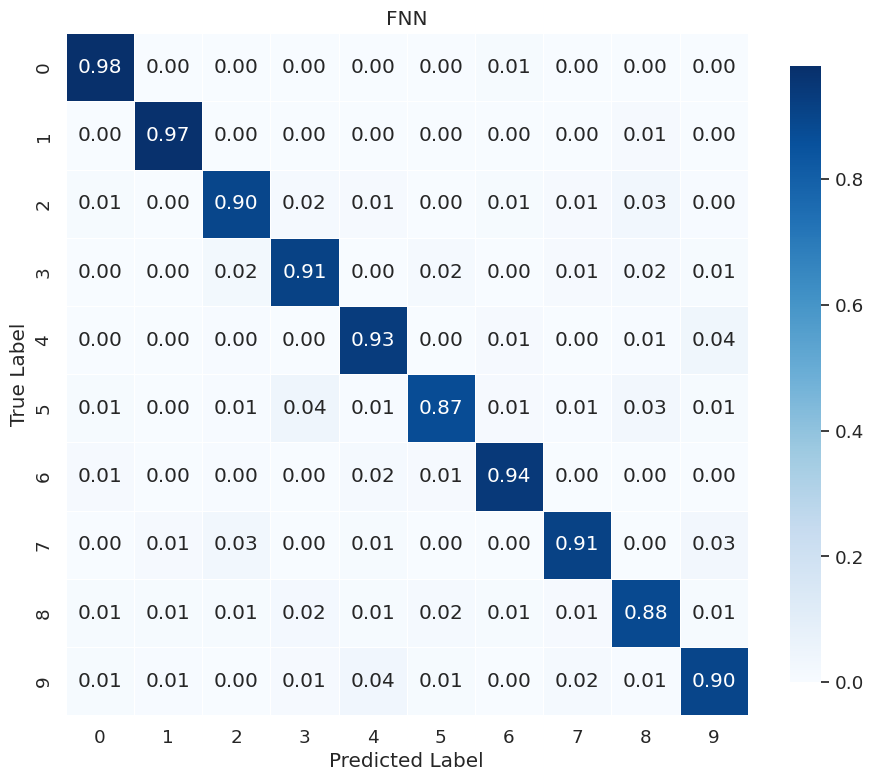

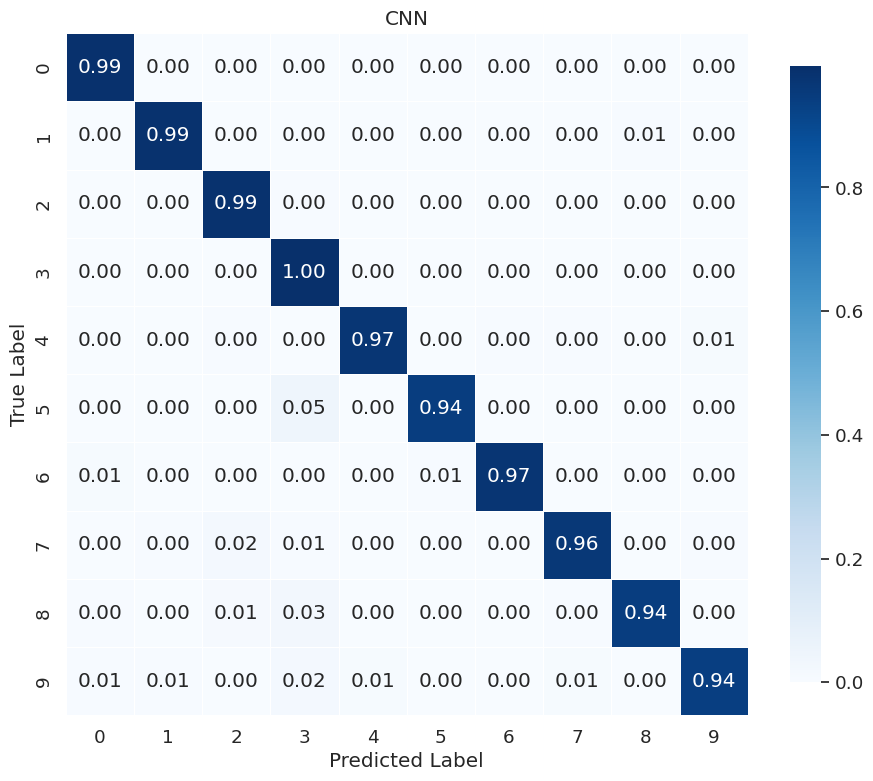

In [4]:
class_names = [str(ii) for ii in range(10)]

# models: List[Model] = [FNN(), CNN(), CRNN()]

models: List[Model] = [
    FNN("sgd"), CNN("sgd"), CRNN("sgd"),
    # FNN("sgd"), CNN("sgd"), CRNN("sgd")                  
]

for model in models:
    model.compile(optimizer=model.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=5, batch_size=64, shuffle=True)

    predicted_labels = make_predictions(model, test_images)

    accuracy, precision, recall, conf_matrix = calculate_metrics(predicted_labels, np.argmax(test_labels, axis=1))
    save_metrics(str(model), accuracy=accuracy, precision=precision, recall=recall)
    # print(f"{str(model)} Evaluation - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    # print("Confusion Matrix:")
    # print(conf_matrix)
    
    plot_confusion_matrix(conf_matrix, class_names, title=f'{str(model)}', save=True)

    model.save(f"models/{str(model)}", save_format='tf')  